# **Lab assignment 1: *Cluster-median problem***

## **1. Libraries**

In [11]:
# Basic Libraries
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import pandas as pd

# Datasets
from sklearn.datasets import load_digits

# Machine Learning Preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline

# Machine Learning Modelling
from sklearn.linear_model import LogisticRegression

## *2. K Means: Mnist Dataset*

The **MNIST Dataset** is a widely popular database that contains handwritten digits, from 0 to 9. The dataset is made up of 8x8 pixel images, which will be reshaped to vectors 64 spaces long. Due to the popularity of the dataset, which is part of an active competition on Kaggle (https://www.kaggle.com/c/digit-recognizer), many people have worked several hours testing different approaches in order to achieve better performances. It's a very good challenge even for both machine learner beginners and deep learning beginners.

### *2.1. Load the dataset*

In [25]:
Xm, ym = load_digits(return_X_y=True)

### *2.2. Basic dataset information and visualization*

The **MNIST Dataset** has a length of 1797 elements. The distribution of all the classes in the dataset is balanced, meaning that every class has nearly the same amount of elements. 

In [7]:
Xm.shape, ym.shape

((1797, 64), (1797,))

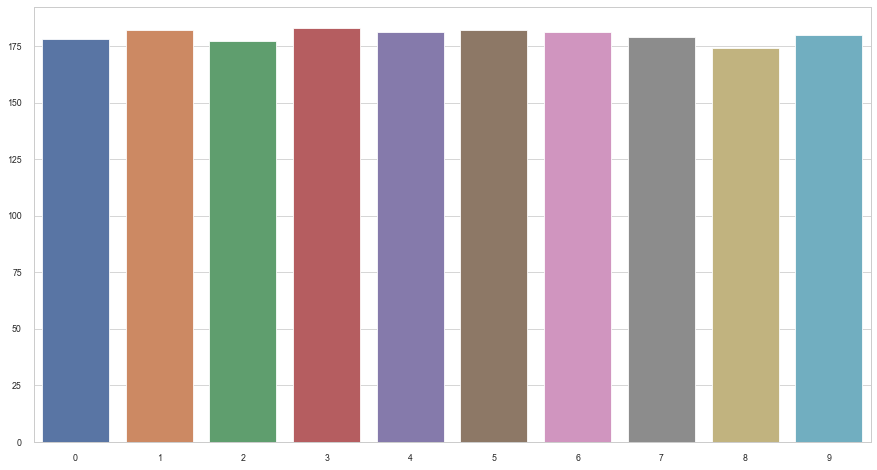

In [59]:
ym = pd.DataFrame(ym)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=[i[0] for i in ym.value_counts().index], y=ym.value_counts())

Now, let's plot some images of the dataset, just to get an idea of what we are working with. Since I've loaded the dataset from sklearn, the shape of the data is directly a vector of 64 positions. I'll have to reshape the vector to an 8x8 matrix in order to print the images.

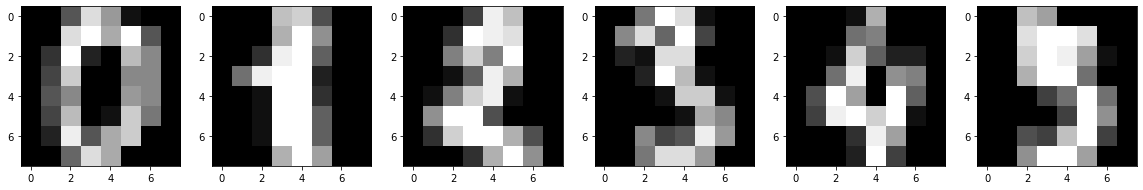

In [26]:
fig, ax = plt.subplots(1, 6, figsize=(20, 6))

for i in range(6):
    ax[i].imshow(Xm[i].reshape(8,8), cmap="gray")

Once we undertoot the basic properties of the dataset, it's time to do some visualization. Our images have a shape of 64, which make the plotting task harder for the human eye. Just for visualization purposes, let's implement a Principal Component Analysis (PCA) to reduce the dimension from 64 to 3, keeping the maximum variability of the independent variable in this varibles.

**2D Visualization**

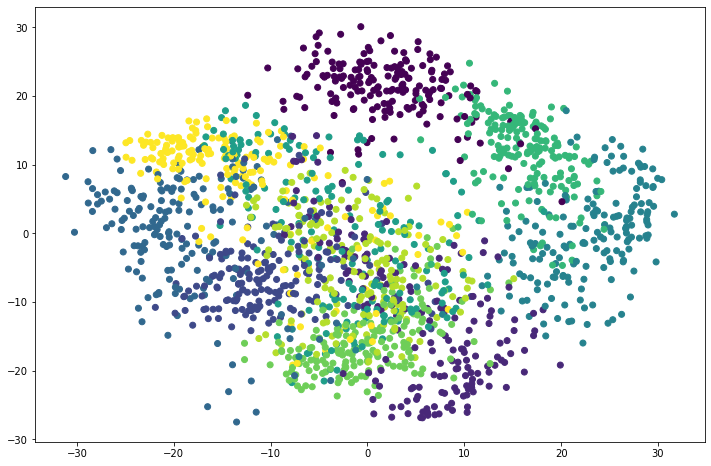

In [54]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(Xm)

PCA_0 = [c[0] for c in principalComponents]
PCA_1 = [c[1] for c in principalComponents]
PCA_2 = [c[2] for c in principalComponents]

plt.figure(figsize=(12, 8))
plt.scatter(x = PCA_0, y=PCA_1, c=ym)

**3D Visualization**

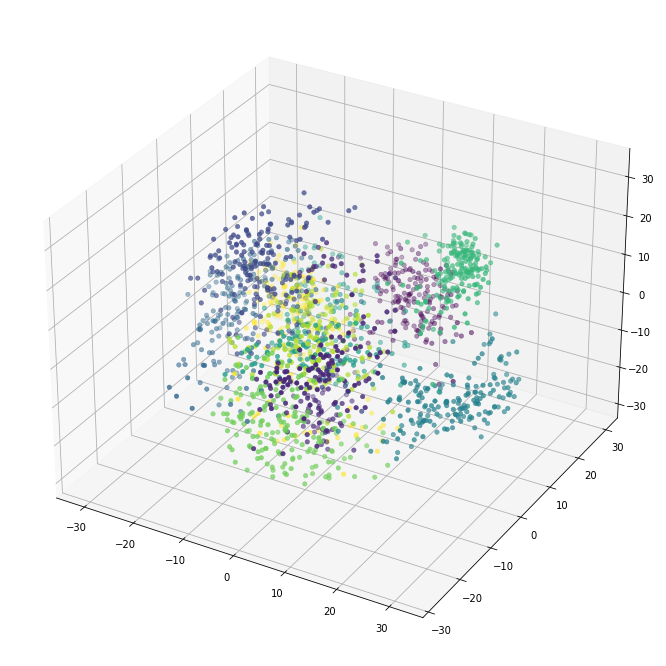

In [61]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

ax.scatter(PCA_0, PCA_1, PCA_2, c=ym, cmap='viridis', linewidth=0.5)

### *2.3. KMeans: Clustering and Modelling*

The first thing which is important about the KMeans algorithm is that we have to know the number of clusters before the implementation. Sometimes it's easy because we know how many classes we are looking for. For example, in this particular case, we have 10 different numbers, so we know that the number of clusters will be around 10. However, most of the time this will not be the case. For this reason, it's important to know some metrics that help us to figure out that parameter. The Elbow and Silhouette Score are designed especially for this task. 

the following article explains these concepts very well: https://medium.com/@jonathanrmzg/k-means-elbow-method-and-silhouette-e565d7ab87aa

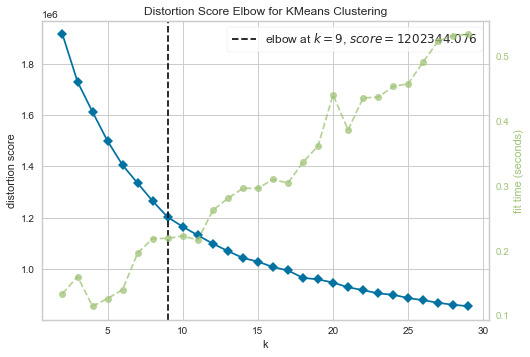

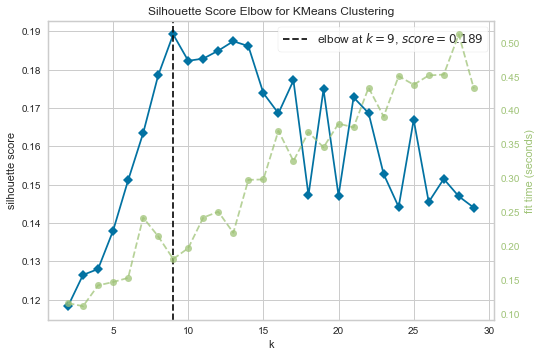

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [110]:
model = KMeans()

# Elbow Method
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(Xm)
visualizer.show()

# Silhouette Method
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(Xm)
visualizer.show() 

Both methods give the same answer: 9 clusters. 

Now, let's first use the smaller dataset, the one we performed PCA, to get a general idea of how the clusters are distributed. After that, we will use the whole dataset, which contains richer information, to perform the same task.

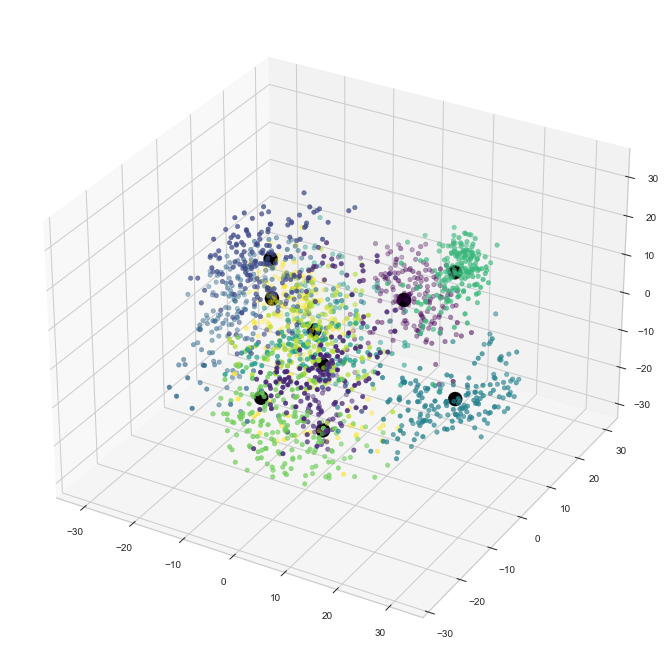

In [111]:
model = KMeans(9)
model.fit(principalComponents)

fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

ax.scatter(PCA_0, PCA_1, PCA_2, c=ym, cmap='viridis', linewidth=0.5)

centers = model.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=1)

In [108]:
pipeline = Pipeline([
    ("kmeans", KMeans(9)),
    ("log_reg", LogisticRegression(max_iter=15000))
])

pipeline.fit(Xm, ym)

Pipeline(steps=[('kmeans', KMeans(n_clusters=9)),
                ('log_reg', LogisticRegression(max_iter=15000))])

In [109]:
pipeline.score(Xm, ym)

0.9259877573734001

In [105]:
principalComponents

array([[ -1.25946734,  21.27488228,  -9.46305907],
       [  7.95761587, -20.76869683,   4.43952038],
       [  6.99192169,  -9.95598593,   2.95855674],
       ...,
       [ 10.80128328,  -6.9602529 ,   5.59954575],
       [ -4.87209472,  12.42395569, -10.17084498],
       [ -0.34439427,   6.36554653,  10.77368811]])

In [62]:
from mst_clustering import MSTClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# create some data with four clusters
X, y = make_blobs(200, centers=4, random_state=42)

# predict the labels with the MST algorithm
model = MSTClustering(cutoff_scale=2)
labels = model.fit_predict(Xm)

# plot the results
labels

array([   0,    1,    2, ..., 1794, 1795, 1796])